In [76]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [3]:
#Pull HTML from UN website and parse
r = requests.get("http://web.archive.org/web/20110514112442/http://unstats.un.org/unsd/demographic/products/socind/education.htm")
soup = BeautifulSoup(r.content,'html.parser')

In [14]:
#Extract data at appropriate level in structure
urlData=[]
for i in soup('table')[6]('tr'):
    #The groups of interest have a length of 25, hence this filter to exclude items not needed
    if len(i) == 25:
        urlData.append(i)

In [63]:
#Manipulate HTML data into DataFrame
colList=['Country','Year','Total','Men','Women']
tableData = pd.DataFrame(columns=['Country','Year','Total','Men','Women'])

i=0
for entry in urlData:
    tableData.loc[i]=[int(entry('td')[v].get_text()) if v > 1 else entry('td')[v].get_text() for v in [0,1,4,7,10]]
    i+=1

#Set country as index and drop old column
tableData=tableData.set_index(tableData['Country'])
tableData=tableData.drop(['Country'],1)
tableData.head()

,Year,Total,Men,Women
Country,,,,
Afghanistan,2004,8.0,11.0,5.0
Albania,2004,11.0,11.0,11.0
Algeria,2005,13.0,13.0,13.0
Andorra,2008,11.0,11.0,12.0
Anguilla,2008,11.0,11.0,11.0


In [80]:
sts.ttest_ind(tableData['Men'],tableData['Women'])

Ttest_indResult(statistic=-0.35754274008519049, pvalue=0.72089275398804431)

Mean School Life Expectancy for Total is 12.45
Median School Life Expectancy for Total is 13.00
Normality Test P-Value for Total is 0.44

Mean School Life Expectancy for Men is 12.39
Median School Life Expectancy for Men is 12.00
Normality Test P-Value for Men is 0.42

Mean School Life Expectancy for Women is 12.51
Median School Life Expectancy for Women is 13.00
Normality Test P-Value for Women is 0.06

Null Hypothesis: School Life Expectancy is equivalent for Men and Women regardless of country
T-Test P-Value: 0.72


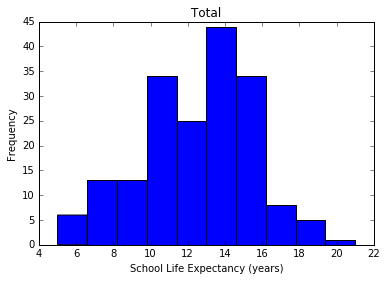

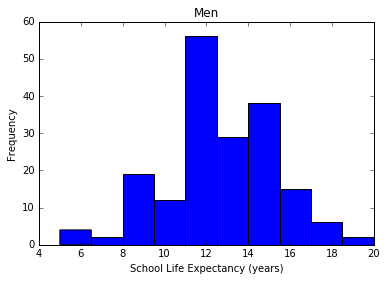

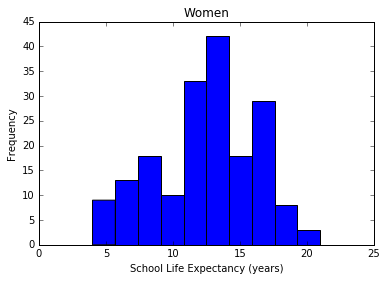

In [82]:
for col in colList[2::]:
    s,p = sts.normaltest(tableData[col])
    print('Mean School Life Expectancy for %s is %0.2f' % (col,tableData[col].mean()))
    print('Median School Life Expectancy for %s is %0.2f' % (col,tableData[col].median()))
    print('Normality Test P-Value for %s is %0.2f\n' % (col,p))
    
    plt.figure()
    plt.hist(tableData[col])
    plt.title(col)
    plt.xlabel('School Life Expectancy (years)')
    plt.ylabel('Frequency')

s,p = sts.ttest_ind(tableData['Men'],tableData['Women'])
print('Null Hypothesis: School Life Expectancy is equivalent for Men and Women regardless of country')
print('T-Test P-Value: %0.2f' % p)
print('Null Hypothesis accepted')